In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from scipy import stats
from pathlib import Path, PureWindowsPath

In [4]:
def extract_dataset_info(data_path):
    # extract information from train.txt
    f = open(os.path.join(data_path, "train.txt"), "r")
    contents_train = f.readlines()
    label_classes, label_train_list, img_train_list = [], [], []
    for sample in contents_train:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        if label not in label_classes:
            label_classes.append(label)
        label_train_list.append(sample[0])
        img_train_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))
    print('Classes: {}'.format(label_classes))

    # extract information from test.txt
    f = open(os.path.join(data_path, "test.txt"), "r")
    contents_test = f.readlines()
    label_test_list, img_test_list = [], []
    for sample in contents_test:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        label_test_list.append(label)
        img_test_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))  # you can directly use img_path if you run in Windows

    return label_classes, label_train_list, img_train_list, label_test_list, img_test_list

In [76]:
def get_tiny_image(img, output_size):
    # To do
    img_resize = cv2.resize(img, output_size, interpolation = cv2.INTER_AREA)
    #normalization
    
    feature = np.zeros(output_size)
    
    feature_omean= img_resize- np.mean(img_resize)
       
    feature = feature_omean / np.linalg.norm(feature_omean.reshape((1,np.prod(feature_omean.shape))))
    
    return feature

In [73]:
def predict_knn(feature_train, label_train, feature_test, k):
    # To do
    return label_test_pred

In [7]:
label_classes, label_train_list, img_train_list, label_test_list, img_test_list = extract_dataset_info("./scene_classification_data")

Classes: ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']


In [74]:
#label_classes

In [119]:
img = cv2.imread(img_train_list[0],0)

#plt.imshow(img, cmap='gray', vmin=0, vmax=255)


sift1 = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift1.detectAndCompute(img,None)


In [100]:
k = 10
output_size= (16,16)
feature_vec = []
for name in img_train_list :
    img = cv2.imread(name,0)
    feature = get_tiny_image(img, output_size)
    feature_vec.append( feature.reshape(np.prod(feature.shape)))

In [101]:
feature_test_vec = []
for name in img_test_list :
    img = cv2.imread(name,0)
    feature_test = get_tiny_image(img, output_size)
    feature_test_vec.append( feature_test.reshape(np.prod(feature_test.shape)))

In [102]:
#img_train_final = normalize_img(feature_vec)
#img_test_final = normalize_img(feature_test_vec)
img_train_final = feature_vec
img_test_final = feature_test_vec

In [103]:
label_train_set = []
for item in label_train_list:
    label_train_set.append(label_classes.index(item))
    
label_train_set = np.array(label_train_set)
print(label_train_set)


[ 0  0  0 ... 14 14 14]


In [104]:
label_test_set = []
for item in label_test_list:
    label_test_set.append(label_classes.index(item))
    
label_test_set = np.array(label_test_set)
print(label_test_set)

[ 0  0  0 ... 14 14 14]


In [105]:
#img_test_final

In [106]:
nbrs = NearestNeighbors(algorithm='auto').fit(img_train_final)
    
distances_map,indices_map =nbrs.kneighbors(img_test_final,n_neighbors=k)

In [96]:
#print(indices)
#print(indices[0,:])
counts = np.bincount(label_train_set[indices[0,:]])
#print(counts)
print(np.argmax(counts))

#label_predict =

12


In [97]:
#neigh = NearestNeighbors(n_neighbors=k)
#neigh.fit(img_train_final) 
#NearestNeighbors(algorithm='auto')


In [98]:
#map = neigh.kneighbors(np.array([img_test_final]))
#distances_map,indices_map = neigh.kneighbors(img_test_final)

In [99]:
print(distances_map,indices_map)

[[1996.27 1996.27 1996.28 ... 1996.31 1996.31 1996.31]
 [2309.12 2309.13 2309.14 ... 2309.16 2309.16 2309.16]
 [2495.86 2495.87 2495.87 ... 2495.88 2495.88 2495.89]
 ...
 [1674.18 1674.19 1674.2  ... 1674.21 1674.21 1674.21]
 [1641.86 1641.94 1641.96 ... 1641.99 1641.99 1641.99]
 [1704.93 1704.95 1704.95 ... 1704.95 1704.95 1704.95]] [[1480 1204 1301 ... 1188 1090 1464]
 [ 612  923 1434 ...  985  683  930]
 [ 607 1286  627 ... 1255 1288  695]
 ...
 [ 901  900  958 ...  991  954 1084]
 [1454  806  859 ... 1293 1271  203]
 [1203 1212  508 ... 1133  940  502]]


In [87]:
class_index = np.zeros(len(indices_map))
for num in range(len(indices_map)):
    class_index[num] = np.argmax(np.bincount(label_train_set[indices_map[num,:]]))

In [88]:
class_index

array([12.,  9.,  6., ...,  9.,  8.,  5.])

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
y_true = label_test_set
y_pred = class_index
confusion_map = confusion_matrix(y_true, y_pred)
confusion_rate = np.trace(confusion_map)/np.sum(np.sum(confusion_map))


In [91]:
print(confusion_map)

[[ 7  2  9  7 11  3  6  3  1  9 11  9 11 10  1]
 [ 8  2 12  5  0  5  3  2  5 11 10  6 18  7  6]
 [ 5  1 15  6  4 10  3  1  2  6 23  6 11  5  2]
 [ 1  0 12  9  2  3  3  4  5 13 27  4  7  7  3]
 [ 5  0  7  4 17 10  1  1  3  5 25  0 13  6  3]
 [ 3  2  2  3  2  7  2  2  4  6 38 11 15  3  0]
 [ 2  1  1  1  1  1 49  1  0 16 10  8  7  2  0]
 [ 6  0  2  1  4  6  9  7  4  7 11 16 17  6  4]
 [ 8  2  7  5  9  8  3  0 16  5 17  1  8 10  1]
 [ 3  0  2  2  0  2 13  3  0 50  7  8  5  3  2]
 [ 1  0  0  1  0  0  2  0  0  0 75 14  4  2  1]
 [ 0  1  1  0  0  0  5  7  0  2 23 32 23  6  0]
 [ 0  1  1  0  0  1  7  6  0  4 29 15 26  8  2]
 [ 4  1  2  4  0  1  4  4  2  4 14 18 23 17  2]
 [ 4  3  5  4  6  7  8  7  4 11  5 11  9  8  8]]


In [92]:
print(confusion_rate)

0.22466666666666665


Confusion matrix, without normalization
[[ 7  2  9  7 11  3  6  3  1  9 11  9 11 10  1]
 [ 8  2 12  5  0  5  3  2  5 11 10  6 18  7  6]
 [ 5  1 15  6  4 10  3  1  2  6 23  6 11  5  2]
 [ 1  0 12  9  2  3  3  4  5 13 27  4  7  7  3]
 [ 5  0  7  4 17 10  1  1  3  5 25  0 13  6  3]
 [ 3  2  2  3  2  7  2  2  4  6 38 11 15  3  0]
 [ 2  1  1  1  1  1 49  1  0 16 10  8  7  2  0]
 [ 6  0  2  1  4  6  9  7  4  7 11 16 17  6  4]
 [ 8  2  7  5  9  8  3  0 16  5 17  1  8 10  1]
 [ 3  0  2  2  0  2 13  3  0 50  7  8  5  3  2]
 [ 1  0  0  1  0  0  2  0  0  0 75 14  4  2  1]
 [ 0  1  1  0  0  0  5  7  0  2 23 32 23  6  0]
 [ 0  1  1  0  0  1  7  6  0  4 29 15 26  8  2]
 [ 4  1  2  4  0  1  4  4  2  4 14 18 23 17  2]
 [ 4  3  5  4  6  7  8  7  4 11  5 11  9  8  8]]


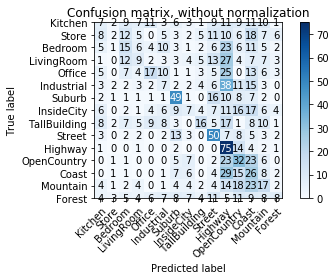

In [93]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=label_classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_true, y_pred, classes=label_classes, normalize=True,
#                      title='Normalized confusion matrix')

In [94]:
def normalize_img(feature_vec):
    img_nonzeromean = np.array(feature_vec)
    img_nonunit = img_nonzeromean
    img_final = np.zeros(img_nonzeromean.shape)

    img_ave = np.mean(img_nonzeromean)

    img_nonunit = img_nonzeromean - img_ave

    for i in range(len(img_nonzeromean)):
        img_final[i,:] = img_nonunit[i,:]/np.linalg.norm(img_nonunit[i,:])
    
    return img_final
    